# Tableau de capacité variable

## Principe 

Trois attributs sont nécessaires

* l'addresse _variable_ de début des données
* la capacité _variable_
* la taille _variable_

Ce sont les mêmes attributs que pour un tableau de capacité fixe, mais deux d'entre eux sont maintenant _variables_ et plus _constants_

* la capacité 
* l'emplacement mémoire où l'on stocke des données

On peut donc réutiliser le tableau de capacité fixe comme base

In [1]:
import include.tableau_capacite_fixe as h

class Tableau:   
    def __init__(self):
        self.data = []
        self.capacite = 0
        self.taille = 0
        
# Methodes de tableau de taille fixe
    __str__     = h.convertir_en_texte
    __len__     = h.taille
    __getitem__ = h.lire_valeur_indice
    __setitem__ = h.ecrire_valeur_indice
    def __pop__(i = -1):
        if i >= 0: h.supprimer_en_position(self,i)
        else: h.supprimer_en_queue(self)

Mais nous n'utiliserons plus la fonction  

In [2]:
def verifier_place_disponible(T,besoin = 1):
    if T.taille + besoin > T.capacite:
        raise Exception("capacité insuffisante")

En cas de capacité insuffisante, on l'augmentera sans que cela ne perturbe l'exécution. Ce changement concerne donc les fonctions  

* `inserer_en_queue(T,valeur)`
* `inserer_en_position(T,indice,valeur)`
* `redimensionner(T,taille_demandee,valeur = 0)`

à laquelle on ajoutera éventuellement une fonction `reserver_capacite(T,capacite)`. 

## Insérer en queue

On remplace l'appel à `verifier_place_disponible` par le code augmentant la capacité

La stratégie la plus courrante consiste à passer de 0 à 1, puis à **doubler la capacité** si nécessaire. 

Il ne faut **déplacer** le contenu de l'ancien au nouvel espace en mémoire, et - si le langage le demande - **détruire** l'ancien espace. 

In [3]:
def inserer_en_queue(T,valeur):
    if T.taille >= T.capacite:
        T.capacite = 2 * T.capacite if T.capacite > 0 else 1
        tmp = [None]*T.capacite
        tmp[0:T.taille] = T.data[0:T.taille]
        T.data = tmp
        
    T.data[T.taille] = valeur
    T.taille += 1

In [4]:
T = Tableau()
print(T)
    
for i in range(9):
    inserer_en_queue(T,i*i)
    print(T)

T(0/0): []
T(1/1): [0]
T(2/2): [0, 1]
T(3/4): [0, 1, 4, None]
T(4/4): [0, 1, 4, 9]
T(5/8): [0, 1, 4, 9, 16, None, None, None]
T(6/8): [0, 1, 4, 9, 16, 25, None, None]
T(7/8): [0, 1, 4, 9, 16, 25, 36, None]
T(8/8): [0, 1, 4, 9, 16, 25, 36, 49]
T(9/16): [0, 1, 4, 9, 16, 25, 36, 49, 64, None, None, None, None, None, None, None]


## Insérer en position

La seule différence avec l'insertion en queue est qu'il faut déplacer les éléments d'incides `[indice,taille[` de 1 vers la droite avant d'écrire à l'indice demandé. 

Lors des réallocations, le déplacement s'effectue en une seule fois de `data` à `tmp` et de 1 position vers la droite. 

In [5]:
def inserer_en_position(T,i,valeur):
    if T.taille >= T.capacite:     
        T.capacite = 2 * T.capacite if T.capacite > 0 else 1
        tmp = [None]*T.capacite
        tmp[0:i] = T.data[0:i]
        tmp[T.taille:i:-1] = T.data[T.taille-1:i-1:-1]
        T.data = tmp
    else:
        T.data[T.taille:i:-1] = T.data[T.taille-1:i-1:-1]
        
    T.data[i] = valeur
    T.taille += 1

In [6]:
T = Tableau()
print(T)
    
for i in range(9):
    pos = ( len(T) + 1 )// 2
    inserer_en_position(T,pos,i*i)
    print(pos,T)

T(0/0): []
0 T(1/1): [0]
1 T(2/2): [0, 1]
1 T(3/4): [0, 4, 1, None]
2 T(4/4): [0, 4, 9, 1]
2 T(5/8): [0, 4, 16, 9, 1, None, None, None]
3 T(6/8): [0, 4, 16, 25, 9, 1, None, None]
3 T(7/8): [0, 4, 16, 36, 25, 9, 1, None]
4 T(8/8): [0, 4, 16, 36, 49, 25, 9, 1]
4 T(9/16): [0, 4, 16, 36, 64, 49, 25, 9, 1, None, None, None, None, None, None, None]


## Redimensionner

Redimensionner utilise le même code de réallocation que d'insérer en queue. Ensuite, on ajoute les nouveau éléments ou en détruit les anciens selon que la taille augmente ou diminue. 

In [7]:
def redimensionner(T,taille_demandee,valeur = 0):
    diff = taille_demandee - T.taille

    if taille_demandee >= T.capacite:
        T.capacite = taille_demandee
        tmp = [None]*T.capacite
        tmp[0:T.taille] = T.data[0:T.taille]
        T.data = tmp

    if diff > 0:
        T.data[T.taille:taille_demandee] = [valeur]*diff
    else:
        T.data[taille_demandee:T.taille] = [None]*-diff
        
    T.taille = taille_demandee

In [20]:
T = Tableau()
for i in range(5): inserer_en_queue(T,i)
print(T)
redimensionner(T,3)
print(T)
redimensionner(T,6,42)
print(T)
redimensionner(T,11,-1)
print(T)

T(5/8): [0, 1, 2, 3, 4, None, None, None]
T(3/8): [0, 1, 2, None, None, None, None, None]
T(6/8): [0, 1, 2, 42, 42, 42, None, None]
T(11/11): [0, 1, 2, 42, 42, 42, -1, -1, -1, -1, -1]


## Faut-il diminuer la capacité?

Pas vraiment. 

En C++, la STL  

* ne le fait pas automatiquement
* ne fournit `std::vector::shrink_to_fit()` que depuis C++11. 

Si on veut le faire automatiquement, il faut choisir un *critère différent* de celui d'augmentation. Par exemple

* multiplier par deux la capacité si `taille >= capacite`
* diviser par deux la capacité si `taille < capacite / 4`

## Complexité

Pour mesurer la complexité de l'opération d'insertion en queue avec réallocation en cas de capacité insuffisante, comptons les écritures dans les tableaux.

In [9]:
def inserer_en_queue_cnt(T,valeur):  
    cnt = 0
    if T.taille >= T.capacite:
        T.capacite = 2 * T.capacite if T.capacite > 0 else 1
        tmp = [None]*T.capacite
        tmp[0:T.taille] = T.data[0:T.taille]; cnt += T.taille 
        T.data = tmp
        
    T.data[T.taille] = valeur; cnt += 1 
    T.taille += 1
    return cnt

Intéressons nous au remplissage d'un tableau originellement vide en appelant $n$ fois `inserer_en_queue`

In [10]:
n = 10

In [11]:
T = Tableau(); 
for i in range(n): inserer_en_queue(T,i*i)

La complexité de l'insertion de $n$ semble linéaire en $n$

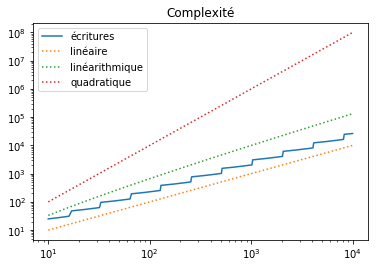

In [16]:
import include.tableau_capacite_variable as ext
ext.affiche_complexite_1(Tableau,inserer_en_queue_cnt)

Un graphique linéraire nous donne une meilleure vue. Les nombre d'écritures varie entre 2 et 3 fois la taille.

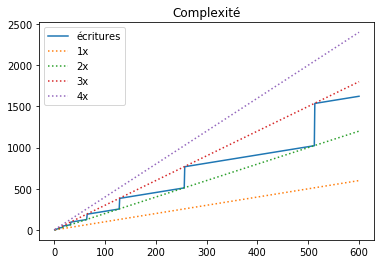

In [13]:
ext.affiche_complexite_2(Tableau,inserer_en_queue_cnt)

La complexité d'une seule opération d'insertion est la plupart du temps $\Theta(1)$. Il n'y a pas de redimensionnement, ce qui est le meilleur cas.

Elle est $\Theta(n)$ quand on doit augmenter la capacité, i.e. pour $n = 2^k+1$ avec $k$ entier, les pires cas.

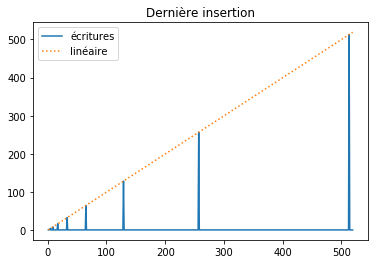

In [14]:
ext.affiche_complexite_3(Tableau,inserer_en_queue_cnt)

En moyenne, la complexité de `inserer_en_queue` est constante $\Theta(1)$.

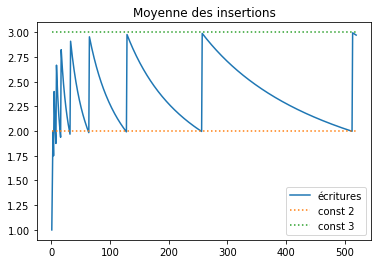

In [15]:
ext.affiche_complexite_4(Tableau,inserer_en_queue_cnt)

<table style="width: 100%; border: 0px">
<tr style="background-color:white; border:0px">
<td style="width: 120px; border: 0px">
    <img src="https://heig-vd.ch/ResourcePackages/WhiteFox/assets/images/logo-heig-vd.svg" height=200px align=left >
    </td>
    <td style="vertical-align: middle; border: 0px" height=200px>
    <p style="text-align: left">
        <a href="https://ocuisenaire.github.io/ASD1-notebooks/">ASD1 Notebooks on GitHub.io</a>
 </p>        
<p style="text-align: left">
© Olivier Cuisenaire, 2018 </p>
</td>
</tr>
</table>